<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/TEMP_Undistortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (270/270), done.
remote: Total 270 (delta 189), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (270/270), 51.48 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (189/189), done.


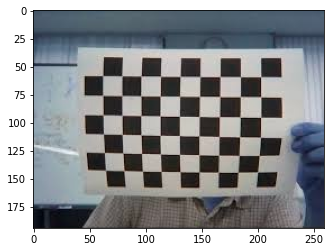

In [3]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_2.jpg')
plt.imshow(img)

True


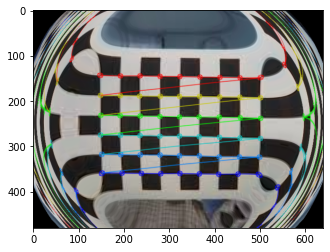

In [10]:
#https://moon-coco.tistory.com/entry/OpenCVCamera-Calibration%EC%B9%B4%EB%A9%94%EB%9D%BC-%EC%99%9C%EA%B3%A1-%ED%8E%B4%EA%B8%B0
import numpy as np
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
wc = 9
hc = 6
objp = np.zeros((wc*hc,3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1,2)

objpoints = []
imgpoints = []

file = '/content/AP_Test_OPEN/ChessBoard_2.jpg'
#dist_file = 

img = cv2.imread(file)
_img = cv2.resize(img, dsize = (640, 480), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
print(ret)

if ret == True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray, corners, (10,10), (-1, -1), criteria)
    imgpoints.append(corners2)

    img = cv2.drawChessboardCorners(_img, (wc, hc), corners2, ret)

    ret, mtx, dist,rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    h, w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), -1)

    dst = cv2.undistort(img, mtx, dist)
    dst2= cv2.undistort(img, mtx, dist, None, newcameramtx)
    plt.imshow(dst)
    #plt.imshow(dst2)
    cv2.waitKey(0)

cv2.destroyAllWindows()
